Sampling Rate for C:\Users\jagad\OneDrive\Documents\songs\[iSongs.info] O Manasa Omanasa.mp3: 22050 Hz
Spectral Features:
Chroma STFT: (12, 10502)
Spectral Centroid: (1, 10502)
Spectral Bandwidth: (1, 10502)
Spectral Rolloff: (1, 10502)
Spectral Contrast: (7, 10502)
Spectral Flatness: (1, 10502)
Zero Crossing Rate: (1, 10502)
Rhythm Features:
Tempogram Mean: (384,)
Tempogram Std: (384,)


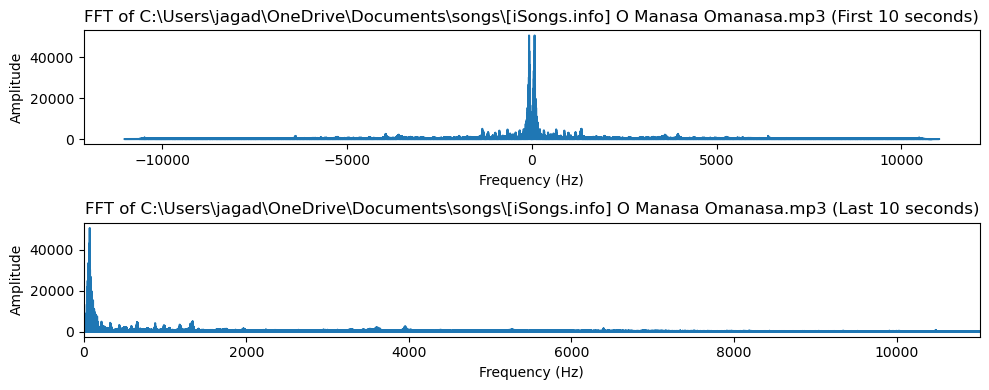

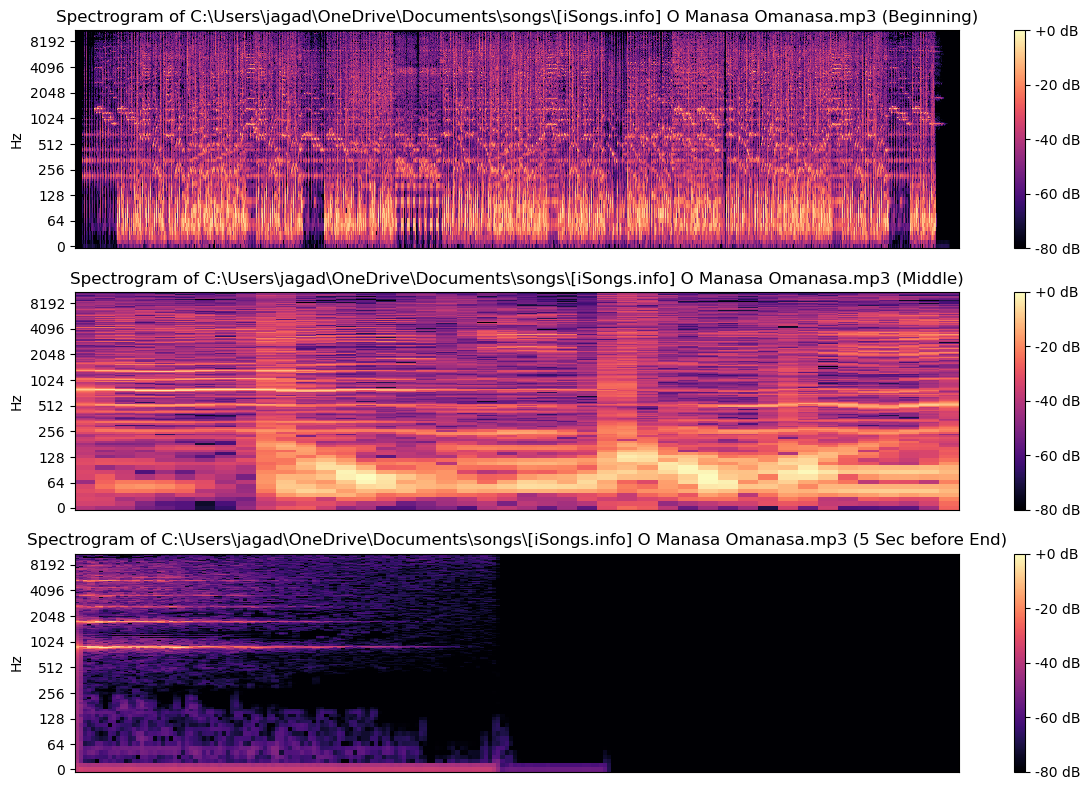

Sampling Rate for C:\Users\jagad\OneDrive\Documents\songs\[iSongs.info] Thirumala Vasa.mp3: 22050 Hz
Spectral Features:
Chroma STFT: (12, 5564)
Spectral Centroid: (1, 5564)
Spectral Bandwidth: (1, 5564)
Spectral Rolloff: (1, 5564)
Spectral Contrast: (7, 5564)
Spectral Flatness: (1, 5564)
Zero Crossing Rate: (1, 5564)
Rhythm Features:
Tempogram Mean: (384,)
Tempogram Std: (384,)


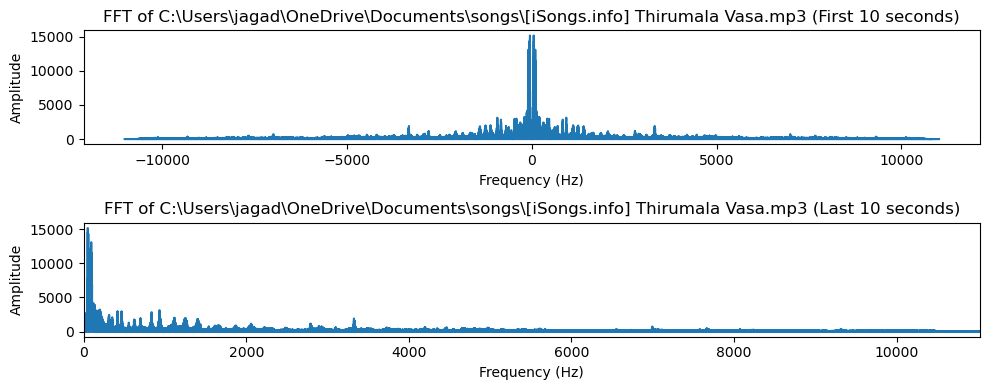

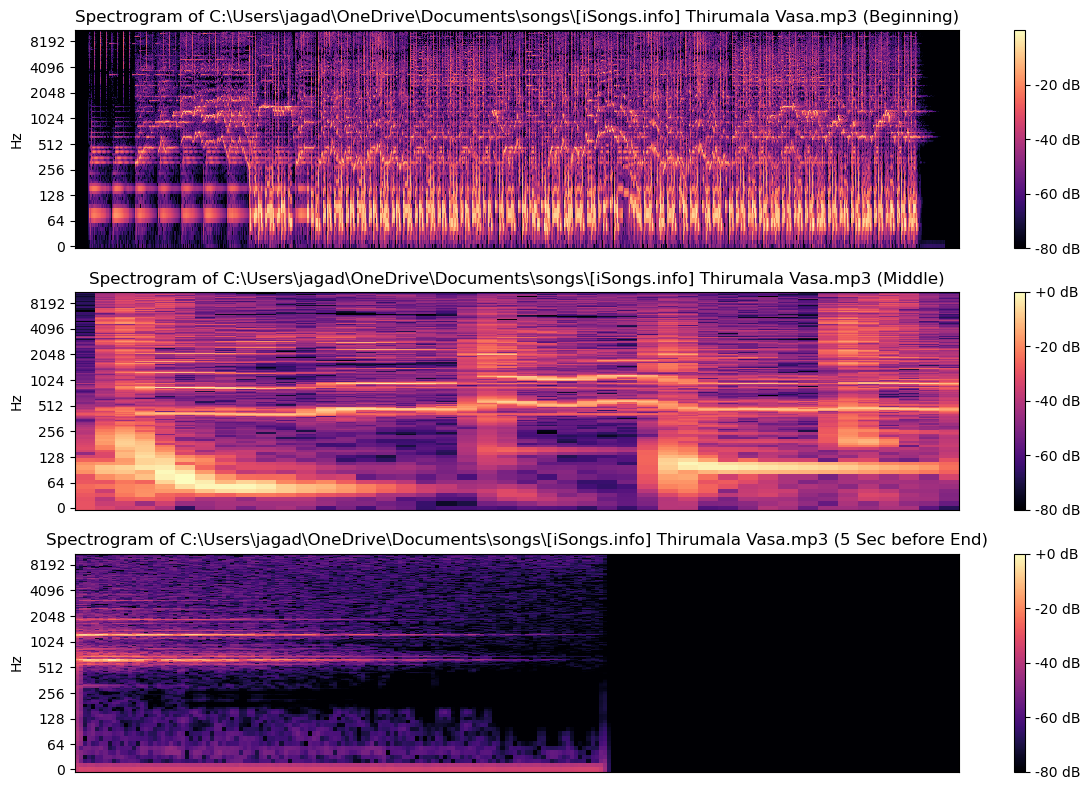

Sampling Rate for C:\Users\jagad\OneDrive\Documents\songs\[iSongs.info] Yerra Koka Pachha Raika.mp3: 22050 Hz
Spectral Features:
Chroma STFT: (12, 11233)
Spectral Centroid: (1, 11233)
Spectral Bandwidth: (1, 11233)
Spectral Rolloff: (1, 11233)
Spectral Contrast: (7, 11233)
Spectral Flatness: (1, 11233)
Zero Crossing Rate: (1, 11233)
Rhythm Features:
Tempogram Mean: (384,)
Tempogram Std: (384,)


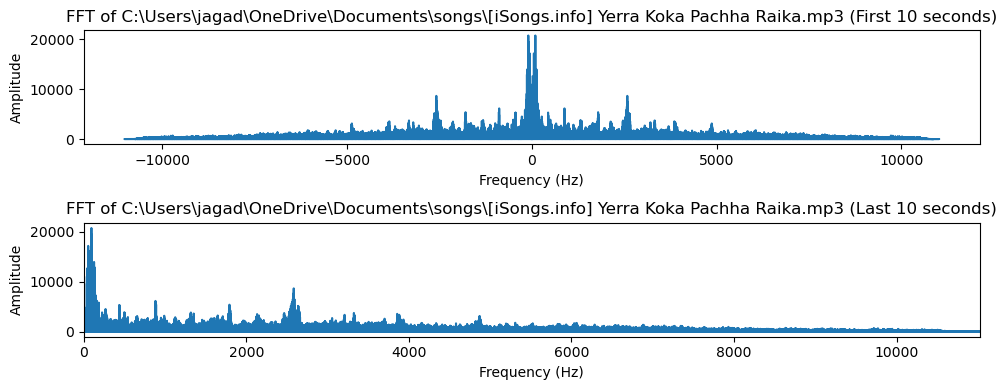

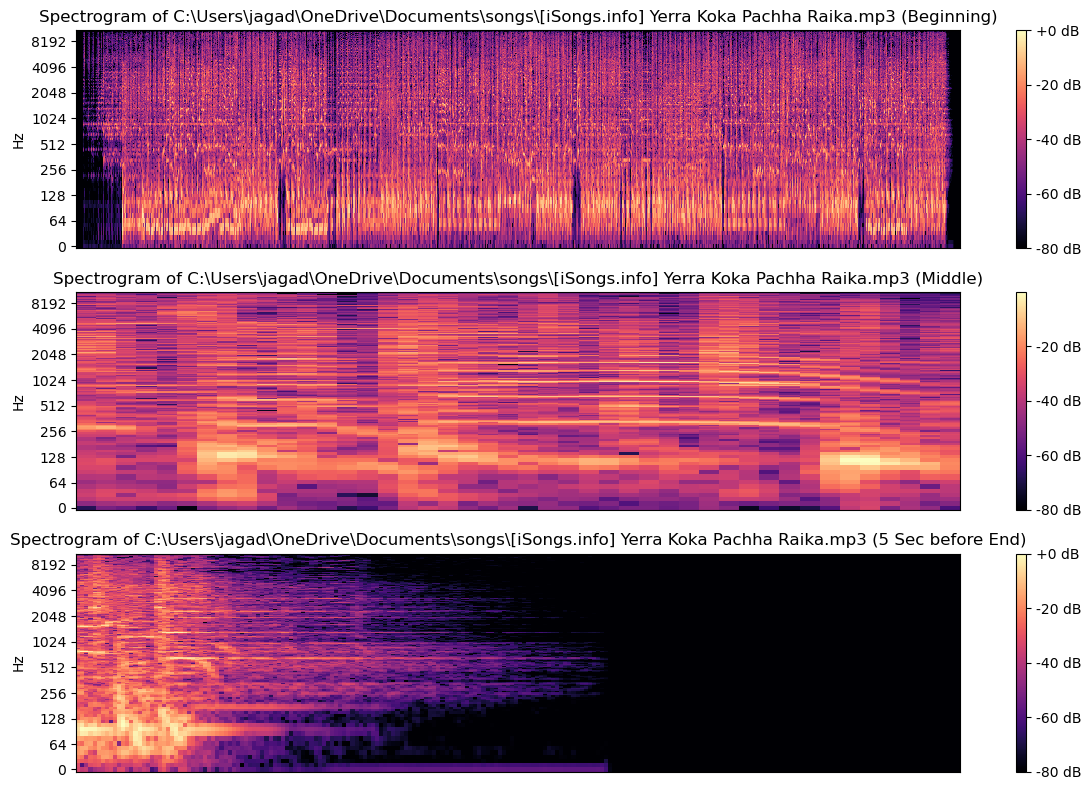

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Specify the file paths of your audio files
audio_files = [
    "C:\\Users\\jagad\\OneDrive\\Documents\\songs\\[iSongs.info] O Manasa Omanasa.mp3",
    "C:\\Users\\jagad\\OneDrive\\Documents\\songs\\[iSongs.info] Thirumala Vasa.mp3",
    "C:\\Users\\jagad\\OneDrive\\Documents\\songs\\[iSongs.info] Yerra Koka Pachha Raika.mp3"
]

for audio_file in audio_files:
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Display Sampling Rate
    print(f"Sampling Rate for {audio_file}: {sr} Hz")

    # Display useful audio features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(y=y)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

    print("Spectral Features:")
    print(f"Chroma STFT: {chroma_stft.shape}")
    print(f"Spectral Centroid: {spectral_centroid.shape}")
    print(f"Spectral Bandwidth: {spectral_bandwidth.shape}")
    print(f"Spectral Rolloff: {spectral_rolloff.shape}")
    print(f"Spectral Contrast: {spectral_contrast.shape}")
    print(f"Spectral Flatness: {spectral_flatness.shape}")
    print(f"Zero Crossing Rate: {zero_crossing_rate.shape}")

    # Calculate rhythm features
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)
    tempogram_mean = np.mean(tempogram, axis=1)
    tempogram_std = np.std(tempogram, axis=1)

    print("Rhythm Features:")
    print(f"Tempogram Mean: {tempogram_mean.shape}")
    print(f"Tempogram Std: {tempogram_std.shape}")

    # Perform Fourier Transforms (FFT)
    fft_result = np.fft.fft(y)
    fft_freqs = np.fft.fftfreq(len(fft_result), 1.0 / sr)

    # Plot FFT of 10-second segments
    plt.figure(figsize=(10, 4))
    plt.subplot(2, 1, 1)
    plt.title(f"FFT of {audio_file} (First 10 seconds)")
    plt.plot(fft_freqs, np.abs(fft_result))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    plt.subplot(2, 1, 2)
    plt.title(f"FFT of {audio_file} (Last 10 seconds)")
    plt.plot(fft_freqs, np.abs(fft_result))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.xlim(0, sr / 2)

    plt.tight_layout()
    plt.show()

    # Plot spectrogram
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max), y_axis='log')
    plt.title(f"Spectrogram of {audio_file} (Beginning)")
    plt.colorbar(format="%+2.0f dB")

    plt.subplot(3, 1, 2)
    mid_start = len(y) // 2 - sr // 2
    mid_end = len(y) // 2 + sr // 2
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y[mid_start:mid_end])), ref=np.max), y_axis='log')
    plt.title(f"Spectrogram of {audio_file} (Middle)")
    plt.colorbar(format="%+2.0f dB")

    plt.subplot(3, 1, 3)
    end_start = len(y) - 5 * sr
    end_end = len(y)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y[end_start:end_end])), ref=np.max), y_axis='log')
    plt.title(f"Spectrogram of {audio_file} (5 Sec before End)")
    plt.colorbar(format="%+2.0f dB")

    plt.tight_layout()
    plt.show()


In [1]:
import numpy as np

# Define the activation function (e.g., sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Neuron class
class Neuron:
    def __init__(self):
        self.weights = []
        self.bias = np.random.randn()

    def initialize_weights(self, num_weights):
        self.weights = np.random.randn(num_weights)

# Layer class
class Layer:
    def __init__(self, num_neurons, num_inputs_per_neuron):
        self.neurons = [Neuron() for _ in range(num_neurons)]
        for neuron in self.neurons:
            neuron.initialize_weights(num_inputs_per_neuron)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.input_layer = Layer(input_size, 1)
        self.hidden_layer = Layer(hidden_size, input_size)
        self.output_layer = Layer(output_size, hidden_size)

    def forward(self, inputs):
        # Forward propagation
        hidden_layer_output = []
        for neuron in self.hidden_layer.neurons:
            z = np.dot(inputs, neuron.weights) + neuron.bias
            a = sigmoid(z)
            hidden_layer_output.append(a)
        hidden_layer_output = np.array(hidden_layer_output)

        output_layer_output = []
        for neuron in self.output_layer.neurons:
            z = np.dot(hidden_layer_output, neuron.weights) + neuron.bias
            a = sigmoid(z)
            output_layer_output.append(a)
        output_layer_output = np.array(output_layer_output)

        return hidden_layer_output, output_layer_output

    def backward(self, inputs, hidden_layer_output, output_layer_output, target, learning_rate):
        # Backpropagation
        output_layer_delta = (target - output_layer_output) * sigmoid_derivative(output_layer_output)
        hidden_layer_delta = np.dot(output_layer_delta, [neuron.weights for neuron in self.output_layer.neurons]) * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        for i, neuron in enumerate(self.output_layer.neurons):
            neuron.weights += learning_rate * output_layer_delta[i] * hidden_layer_output
            neuron.bias += learning_rate * output_layer_delta[i]

        for i, neuron in enumerate(self.hidden_layer.neurons):
            neuron.weights += learning_rate * hidden_layer_delta[i] * inputs
            neuron.bias += learning_rate * hidden_layer_delta[i]

# Data import function (replace with your own data loading code)
def load_data():
    # Load your data here
    # Return input_data and target_data
    input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    target_data = np.array([[0, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0]])
    return input_data, target_data

# Main training function
def train_network(network, input_data, target_data, num_epochs, learning_rate):
    for epoch in range(num_epochs):
        for i in range(len(input_data)):
            inputs = input_data[i]
            target = target_data[i]
            
            hidden_layer_output, output_layer_output = network.forward(inputs)
            network.backward(inputs, hidden_layer_output, output_layer_output, target, learning_rate)
    
    print("Training complete!")

# Initialize the neural network
input_size = 2
hidden_size = 4
output_size = 3
learning_rate = 0.1
num_epochs = 10000

network = NeuralNetwork(input_size, hidden_size, output_size)

# Load data
input_data, target_data = load_data()

# Train the network
train_network(network, input_data, target_data, num_epochs, learning_rate)


Training complete!
